# Exploratory Data Analysis (EDA) for Gaming Forecast Project

This notebook explores the cleaned datasets prepared for predicting breakout trends in video games.

We will:
- Inspect raw and cleaned data
- Understand structure and columns
- Visualize trends (genre, platform, yearly sales)
- Define target feature (Breakout = top 10% sales)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
vgsales = pd.read_csv("../data/processed/vgsales_cleaned.csv")
topgross = pd.read_csv("../data/processed/topgrossing_cleaned.csv")

# Show first few rows of Video Game Sales
vgsales.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Regional_Sales
0,1,Wii Sports,WII,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,3,Mario Kart Wii,WII,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83
3,4,Wii Sports Resort,WII,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38


In [2]:
print(f"VGSales shape: {vgsales.shape}")
print(vgsales.info())

# Summary statistics
vgsales.describe(include='all').transpose()


VGSales shape: (16327, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  16327 non-null  int64  
 1   Name                  16327 non-null  object 
 2   Platform              16327 non-null  object 
 3   Year                  16327 non-null  float64
 4   Genre                 16327 non-null  object 
 5   Publisher             16291 non-null  object 
 6   NA_Sales              16327 non-null  float64
 7   EU_Sales              16327 non-null  float64
 8   JP_Sales              16327 non-null  float64
 9   Other_Sales           16327 non-null  float64
 10  Global_Sales          16327 non-null  float64
 11  Total_Regional_Sales  16327 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,16327.0,NaN,NaN,NaN,8292.868194,4792.669778,1.0,4136.5,8295.0,12441.5,16600.0
Name,16327,11360,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16327,31,DS,2133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,16327.0,NaN,NaN,NaN,2006.406443,5.828981,1980.0,2003.0,2007.0,2010.0,2020.0
Genre,16327,12,Action,3253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,16291,576,Electronic Arts,1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,16327.0,NaN,NaN,NaN,0.265415,0.821591,0.0,0.0,0.08,0.24,41.49
EU_Sales,16327.0,NaN,NaN,NaN,0.147554,0.508766,0.0,0.0,0.02,0.11,29.02
JP_Sales,16327.0,NaN,NaN,NaN,0.078661,0.311557,0.0,0.0,0.0,0.04,10.22
Other_Sales,16327.0,NaN,NaN,NaN,0.048325,0.189885,0.0,0.0,0.01,0.04,10.57


In [3]:
# Show 10 random rows to visualize data variety
vgsales.sample(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Regional_Sales
12825,13035,Top Spin 2,DS,2006.0,Sports,Take-Two Interactive,0.05,0.00,0.00,0.00,0.05,0.05
9509,9659,Horse Life,DS,2007.0,Simulation,Game Life,0.09,0.02,0.00,0.01,0.13,0.12
3820,3873,The Sims 2: Open for Business,PC,2006.0,Simulation,Electronic Arts,0.46,0.05,0.00,0.00,0.52,0.51
374,376,Batman: Arkham Asylum,X360,2009.0,Action,Eidos Interactive,2.20,0.97,0.02,0.31,3.50,3.50
4979,5050,Dai-4-Ji Super Robot Taisen,SNES,1995.0,Strategy,Banpresto,0.00,0.00,0.38,0.00,0.38,0.38
13268,13482,World Championship Spelling,DS,2010.0,Misc,505 Games,0.04,0.00,0.00,0.00,0.04,0.04
9629,9784,Dance Paradise,X360,2010.0,Misc,Mindscape,0.10,0.01,0.00,0.01,0.12,0.12
9876,10037,Pocket Soccer League: Calciobit,3DS,2012.0,Sports,Nintendo,0.00,0.00,0.11,0.00,0.11,0.11
612,618,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49,2.49
6910,7022,Gundam Battle Assault,PS,1998.0,Fighting,Namco Bandai Games,0.13,0.09,0.00,0.02,0.23,0.24


In [4]:
# Define breakout threshold (top 10% global sales)
threshold = vgsales['Global_Sales'].quantile(0.9)
vgsales['Breakout'] = (vgsales['Global_Sales'] >= threshold).astype(int)

# Display rows with Breakout column
vgsales[['Name','Global_Sales','Breakout']].head(10)


,Name,Global_Sales,Breakout
0,Wii Sports,82.74,1
1,Super Mario Bros.,40.24,1
2,Mario Kart Wii,35.82,1
3,Wii Sports Resort,33.00,1
4,Pokemon Red/Pokemon Blue,31.37,1
5,Tetris,30.26,1
6,New Super Mario Bros.,30.01,1
7,Wii Play,29.02,1
8,New Super Mario Bros. Wii,28.62,1
9,Duck Hunt,28.31,1


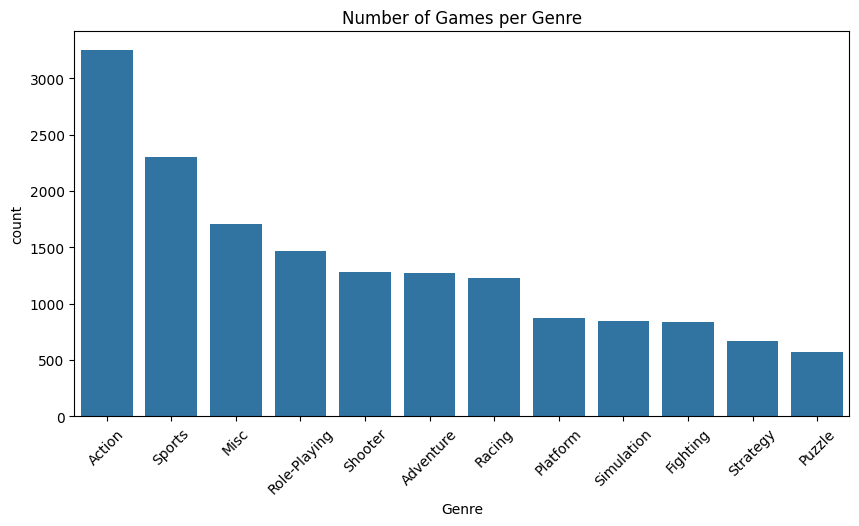

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data=vgsales, x='Genre', order=vgsales['Genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Games per Genre")
plt.show()


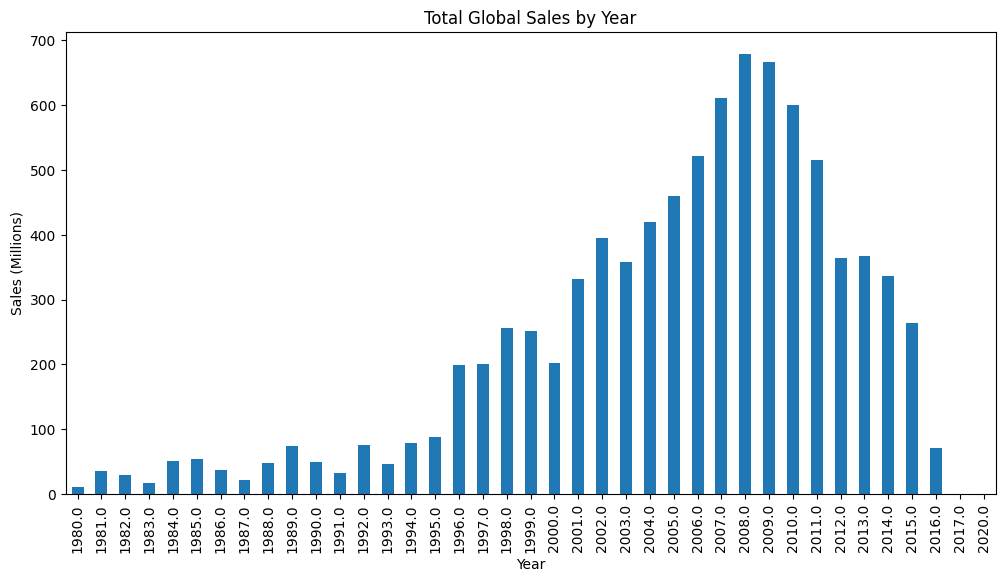

In [6]:
plt.figure(figsize=(12,6))
vgsales.groupby('Year')['Global_Sales'].sum().plot(kind='bar')
plt.title("Total Global Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales (Millions)")
plt.show()


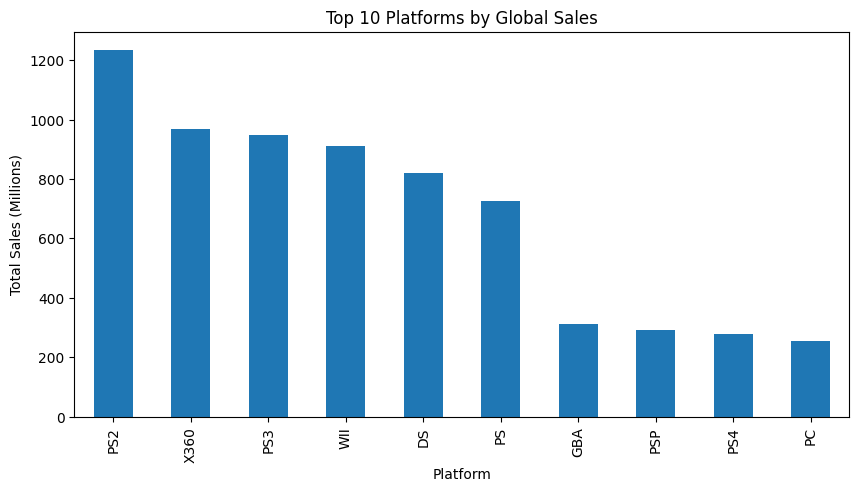

In [7]:
top_platforms = vgsales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_platforms.plot(kind='bar')
plt.title("Top 10 Platforms by Global Sales")
plt.ylabel("Total Sales (Millions)")
plt.show()
